In [30]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [31]:
import getMTAdata as mta
df, links = mta.getAllDf(n_start=0, n_end=1)
filenames = [os.path.split(l)[1] for l in links]
print links
print filenames

getting data from the MTA website...
working on http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt...
ok
['http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt']
['turnstile_160402.txt']


In [32]:
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST   NQR456      BMT  03/26/2016  00:00:00   
1  A002  R051  02-00-00   59 ST   NQR456      BMT  03/26/2016  04:00:00   
2  A002  R051  02-00-00   59 ST   NQR456      BMT  03/26/2016  08:00:00   
3  A002  R051  02-00-00   59 ST   NQR456      BMT  03/26/2016  12:00:00   
4  A002  R051  02-00-00   59 ST   NQR456      BMT  03/26/2016  16:00:00   

      DESC  ENTRIES    EXITS  
0  REGULAR  5595746  1893277  
1  REGULAR  5595746  1893282  
2  REGULAR  5595746  1893282  
3  REGULAR  5595746  1893282  
4  REGULAR  5595746  1893282

In [33]:
# or we can read from the csv file
# df = pandas.read_csv("Saturday, April 02, 2016") 
df.columns = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','IN','OUT']
df = df[['UNIT', 'SCP', 'DATE', 'TIME', "IN", "OUT"]]
df.head(5)

UNIT       SCP        DATE      TIME       IN      OUT
0  R051  02-00-00  03/26/2016  00:00:00  5595746  1893277
1  R051  02-00-00  03/26/2016  04:00:00  5595746  1893282
2  R051  02-00-00  03/26/2016  08:00:00  5595746  1893282
3  R051  02-00-00  03/26/2016  12:00:00  5595746  1893282
4  R051  02-00-00  03/26/2016  16:00:00  5595746  1893282

In [34]:
# Create a coordinates look up table and add a column

geocode = pandas.read_csv('geocoded.csv', header=None)
geocode = geocode.drop_duplicates(0)
geocode = geocode[[0,5,6]]
geocode.columns = ['UNIT', 'LAT', 'LON']
geocode_mapping = {row.values[0]:[row[1], row[2]] for index,row in geocode.iterrows()}

def map(unit):
    try:
        return geocode_mapping[unit]
    except:
        return np.nan

df['COORD'] = df['UNIT'].apply(map)
df['LAT'] = df['COORD'].apply(lambda x: x[0])
df['LON'] = df['COORD'].apply(lambda x: x[1])

In [35]:
df.head(5)

UNIT       SCP        DATE      TIME       IN      OUT  \
0  R051  02-00-00  03/26/2016  00:00:00  5595746  1893277   
1  R051  02-00-00  03/26/2016  04:00:00  5595746  1893282   
2  R051  02-00-00  03/26/2016  08:00:00  5595746  1893282   
3  R051  02-00-00  03/26/2016  12:00:00  5595746  1893282   
4  R051  02-00-00  03/26/2016  16:00:00  5595746  1893282   

                     COORD        LAT        LON  
0  [40.762796, -73.967686]  40.762796 -73.967686  
1  [40.762796, -73.967686]  40.762796 -73.967686  
2  [40.762796, -73.967686]  40.762796 -73.967686  
3  [40.762796, -73.967686]  40.762796 -73.967686  
4  [40.762796, -73.967686]  40.762796 -73.967686

In [36]:
#Add the times as datetime objects

import datetime
df["DATETIME"] = df["DATE"]+ ' ' + df["TIME"]
df["DATETIME"] = pandas.to_datetime(df["DATETIME"])

# uncomment below if we want the day to be int
# df["DAY"] = df.DATETIME.apply(lambda x: int(x.weekday()))

In [37]:
def classify_day(time):
    if time.isoweekday() in range(1,6):
        return "Weekday"
    else:
        return "Weekend"

df["DAY"] = df['DATETIME'].apply(classify_day)

In [38]:
df.head()

UNIT       SCP        DATE      TIME       IN      OUT  \
0  R051  02-00-00  03/26/2016  00:00:00  5595746  1893277   
1  R051  02-00-00  03/26/2016  04:00:00  5595746  1893282   
2  R051  02-00-00  03/26/2016  08:00:00  5595746  1893282   
3  R051  02-00-00  03/26/2016  12:00:00  5595746  1893282   
4  R051  02-00-00  03/26/2016  16:00:00  5595746  1893282   

                     COORD        LAT        LON            DATETIME      DAY  
0  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 00:00:00  Weekend  
1  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 04:00:00  Weekend  
2  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 08:00:00  Weekend  
3  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 12:00:00  Weekend  
4  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 16:00:00  Weekend

In [39]:
def classify_time(time):
    if 5 <= time.hour <= 9:
        return "Morning"
    elif 17 < time.hour < 22:
        return "Evening"
    else:
        return None
df["M_E"] = df['DATETIME'].apply(classify_time)

In [40]:
df.head()

UNIT       SCP        DATE      TIME       IN      OUT  \
0  R051  02-00-00  03/26/2016  00:00:00  5595746  1893277   
1  R051  02-00-00  03/26/2016  04:00:00  5595746  1893282   
2  R051  02-00-00  03/26/2016  08:00:00  5595746  1893282   
3  R051  02-00-00  03/26/2016  12:00:00  5595746  1893282   
4  R051  02-00-00  03/26/2016  16:00:00  5595746  1893282   

                     COORD        LAT        LON            DATETIME      DAY  \
0  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 00:00:00  Weekend   
1  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 04:00:00  Weekend   
2  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 08:00:00  Weekend   
3  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 12:00:00  Weekend   
4  [40.762796, -73.967686]  40.762796 -73.967686 2016-03-26 16:00:00  Weekend   

       M_E  
0     None  
1     None  
2  Morning  
3     None  
4     None

In [41]:
%%time

# make a group reduce function to apply to df.groupby
def group_manipulation(df):
    reduce_df = pandas.Series()
    # IN = df.IN.values; OUT = df.OUT.values
    # IN = IN[1:] - IN[:-1] # convert from cumulative
    # OUT = OUT[1:] - OUT[:-1]
    # mask = (IN >= 0) & (IN < 1e4) & (OUT >= 0) & (OUT < 1e4)
    reduce_df['UNIT'] = df.iloc[0]['UNIT']
    reduce_df['IN'] = df.IN.sum()
    reduce_df['OUT'] = df.OUT.sum()
    reduce_df['LAT'] = df.iloc[0]['LAT']
    reduce_df['LON'] = df.iloc[0]['LON']
    return reduce_df

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs


In [42]:
# define a model to adjust the outflux to conserve mass
def model_outflux(OUT, adjust=1.33):
    """model to adjust outflux for the purpose of mass conservation"""
    return OUT * adjust

In [43]:

def getMasterDF(df, target_DAY='Weekday', target_M_E='Morning', adjust=1.33):
    """
        feed orig. dataframe to perform filtering and grouping then return 
        a tableau friendly masterDF 
    """
    # filter df to target day and timeslot
    df = df.copy()
    df = df[df['DAY'] == target_DAY]
    df = df[df['M_E'] == target_M_E]

    # group data by UNIT and apply group operation
    masterDF = df.groupby('UNIT', as_index=False).apply(group_manipulation)
    masterDF['OUTPRIME'] = masterDF['OUT'].apply(
        lambda x: model_outflux(x, adjust)
    )
    masterDF['FOOTTRAFFIC'] = masterDF.IN + masterDF.OUTPRIME
    masterDF['FLUX'] = (masterDF.IN - masterDF.OUTPRIME) / masterDF.FOOTTRAFFIC
        
    
    print "\tsum of IN",  masterDF.IN.sum()
    print "\tsum of OUT", masterDF.OUT.sum()
    ratio = float(masterDF.OUT.sum()) / masterDF.IN.sum()
    print "\tTotal OUT is {:%} of total IN".format(ratio)
    adjust = 1. / ratio
    print "\tan ajustment parameter should be applied: ", adjust
    filename_group = ''.join([f.split('.')[0]  for f in filenames]
                            ) + '_' + target_DAY + '_' + target_M_E +'.csv'
    print 'saving', filename_group
    print
    masterDF.to_csv(filename_group, index_label=None)
    return masterDF

In [46]:
target_DAYs = ['Weekday', 'Weekend']
target_M_Es = ['Morning', 'Evening']

df['IN'] = np.concatenate([[0], df['IN'].values[1:] - df['IN'].values[:-1]])
df['OUT'] = np.concatenate([[0], df['OUT'].values[1:] - df['OUT'].values[:-1]])
IN = df.IN.values; OUT = df.OUT.values
mask = (IN >= 0) & (IN < 1e4) & (OUT >= 0) & (OUT < 1e4)
df = df[mask]

for target_DAY in target_DAYs:
    for target_M_E in target_M_Es:
        print 'working', target_DAY, target_M_E, '...'
        masterDF = getMasterDF(df, target_DAY, target_M_E, adjust=1.33)

working Weekday Morning ...
	sum of IN 4197197
	sum of OUT 2232172
	Total OUT is 53.182445% of total IN
	an ajustment parameter should be applied:  1.88031970655
saving turnstile_160402_Weekday_Morning.csv

working Weekday Evening ...
	sum of IN 1584046
	sum of OUT 1510493
	Total OUT is 95.356637% of total IN
	an ajustment parameter should be applied:  1.04869469769
saving turnstile_160402_Weekday_Evening.csv

working Weekend Morning ...
	sum of IN 144018
	sum of OUT 69608
	Total OUT is 48.332847% of total IN
	an ajustment parameter should be applied:  2.06898632341
saving turnstile_160402_Weekend_Morning.csv

working Weekend Evening ...
	sum of IN 67953
	sum of OUT 60794
	Total OUT is 89.464777% of total IN
	an ajustment parameter should be applied:  1.11775833141
saving turnstile_160402_Weekend_Evening.csv



In [45]:
masterDF[masterDF['UNIT'] == 'R001']
masterDF

UNIT     IN    OUT        LAT        LON  OUTPRIME  FOOTTRAFFIC      FLUX
0    R001  30060  35039  40.703082 -74.012983  46601.87     76661.87 -0.215777
1    R003   2768    538  40.689945 -73.872564    715.54      3483.54  0.589188
2    R004   7516   1240  40.691320 -73.867135   1649.20      9165.20  0.640117
3    R005   8040    327  40.692304 -73.860151    434.91      8474.91  0.897365
4    R006   7686   1048  40.693866 -73.851568   1393.84      9079.84  0.692981
5    R007   4686    435  40.695184 -73.844326    578.55      5264.55  0.780209
6    R008   4072    697  40.697405 -73.836354    927.01      4999.01  0.629123
7    R009   3429    611  40.700536 -73.828382    812.63      4241.63  0.616831
8    R010   4089   3515  40.757303 -73.989787   4674.95      8763.95 -0.066859
9    R011  67505  11589  40.757303 -73.989787  15413.37     82918.37  0.628228
10   R012  50302  18930  40.752247 -73.993456  25176.90     75478.90  0.332876
11   R013  10758  15821  40.752247 -73.993456  21041.93     31799.93 -0.323395
12   R014  22491  57576  40.709938 -74.007983  76576.08     99067.08 -0.545944
13   R015    428   6224  40.760179 -73.975196   8277.92      8705.92 -0.901676
14   R016    773   6987  40.757530 -73.969102   9292.71     10065.71 -0.846409
15   R017   4982  29449  40.757530 -73.969102  39167.17     44149.17 -0.774311
16   R018  58296  10786  40.746655 -73.891361  14345.38     72641.38  0.605036
17   R019  56297   3004  40.712622 -73.783815   3995.32     60292.32  0.867468
18   R020   3406  48972  40.758652 -73.981311  65132.76     68538.76 -0.900611
19   R021   3974  30194  40.754198 -73.984573  40158.02     44132.02 -0.819904
20   R022  16179  27302  40.749533 -73.987899  36311.66     52490.66 -0.383547
21   R023  31795  34509  40.749533 -73.987899  45896.97     77691.97 -0.181511
22   R024  32455   9697  40.700488 -73.807933  12897.01     45352.01  0.431249
23   R025  70894  12201  40.702131 -73.801110  16227.33     87121.33  0.627477
24   R027   3605  23225  40.706864 -74.009056  30889.25     34494.25 -0.790980
25   R028   1596  12168  40.709938 -74.007983  16183.44     17779.44 -0.820467
26   R029  13347  24784  40.712557 -74.009807  32962.72     46309.72 -0.423577
27   R030   3348  16665  40.715436 -74.009335  22164.45     25512.45 -0.737540
28   R031  25104   8856  40.750329 -73.991096  11778.48     36882.48  0.361297
29   R032  12488  18738  40.755905 -73.986504  24921.54     37409.54 -0.332363
..    ...    ...    ...        ...        ...       ...          ...       ...
436  R449  10502   4628  40.812104 -73.904085   6155.24     16657.24  0.260953
437  R450   6328   4096  40.816083 -73.896060   5447.68     11775.68  0.074757
438  R451  11590   2445  40.656648 -73.950198   3251.85     14841.85  0.561800
439  R452  36192  26950  40.778575 -73.981912  35843.50     72035.50  0.004838
440  R453   1012   8836  40.742981 -73.992727  11751.88     12763.88 -0.841428
441  R454    551   1871  40.665405 -73.992877   2488.43      3039.43 -0.637432
442  R455    619   1018  40.660430 -73.997944   1353.94      1972.94 -0.372510
443  R456    873   2530  40.690545 -73.985065   3364.90      4237.90 -0.588003
444  R460  16568  10531  40.708377 -73.957751  14006.23     30574.23  0.083789
445  R461   5945  25482  40.725297 -73.996204  33891.06     39836.06 -0.701527
446  R462   2539  11570  40.718697 -74.000977  15388.10     17927.10 -0.716742
447  R463   7057  14921  40.718697 -74.000977  19844.93     26901.93 -0.475354
448  R464    939     65  40.668221 -73.834026     86.45      1025.45  0.831391
449  R468    974     53  40.761268 -73.964016     70.49      1044.49  0.865025
450  R469   5557     56  40.757400 -73.954006     74.48      5631.48  0.973549
451  R535   2322   2129  40.660476 -73.830301   2831.57      5153.57 -0.098877
452  R536   7686   6349  40.643942 -73.782356   8444.17     16130.17 -0.047003
453  R540  14880  47215  40.711638 -74.010708  62795.95     77675.95 -0.616870
454  R541  11089  30740  40.748931 -73.988113  40884.20

In [34]:
masterDF.head()

UNIT      IN     OUT        LAT        LON   OUTPRIME  FOOTTRAFFIC  \
0  R001  127718  128358  40.703082 -74.012983  170716.14    298434.14   
1  R003    6607    3776  40.689945 -73.872564    5022.08     11629.08   
2  R004   16902   14670  40.691320 -73.867135   19511.10     36413.10   
3  R005   16339    8062  40.692304 -73.860151   10722.46     27061.46   
4  R006   20116    8949  40.693866 -73.851568   11902.17     32018.17   

       FLUX  
0 -0.144079  
1  0.136289  
2 -0.071653  
3  0.207548  
4  0.256537

---
### running till the above will generate data for [weekday, weekend][morning, evening]

In [28]:
%%time
# --- this is the same as the above cell to group UNIT
# --- but it is looping instead of applying group function

masterDF = pandas.DataFrame(columns=['UNIT', 'IN', 'OUT', 'COORDS'])
DAY = 'Weekday'
M_E = "Morning"
df['IN'] = np.concatenate([[0], df['IN'].values[1:] - df['IN'].values[:-1]])
df['OUT'] = np.concatenate([[0], df['OUT'].values[1:] - df['OUT'].values[:-1]])
IN = df.IN.values; OUT = df.OUT.values
mask = (IN >= 0) & (IN < 1e4) & (OUT >= 0) & (OUT < 1e4)
df = df[mask]
for unit, group in df.groupby(['UNIT']):
    
    # Filter for weekday mornings
    day = group[group.DAY == DAY]
    timeOfDay = day[day.M_E == M_E]
    masterDF.loc[len(masterDF)] = (unit, timeOfDay.IN.sum(), 
                                   timeOfDay.OUT.sum(), group['COORD'].iloc[0])


masterDF.to_csv("SaturdayApril022016-%s-%s"%(DAY, M_E))

CPU times: user 1.92 s, sys: 3.05 ms, total: 1.92 s
Wall time: 1.92 s


In [29]:
masterDF.head()

UNIT   IN   OUT                   COORDS
0  R001  568  1898  [40.703082, -74.012983]
1  R003  158     3  [40.689945, -73.872564]
2  R004  472    13   [40.69132, -73.867135]
3  R005    0     3  [40.692304, -73.860151]
4  R006  372    62  [40.693866, -73.851568]

In [ ]:
masterDF.sum()

In [189]:
masterDF.to_csv("SaturdayApril022016-%s-%s"%(DAY, M_E))

UNIT     IN    OUT                   COORDS
0    R001  30060  35039  [40.703082, -74.012983]
1    R003   2768    538  [40.689945, -73.872564]
2    R004   7516   1240   [40.69132, -73.867135]
3    R005   8040    327  [40.692304, -73.860151]
4    R006   7686   1048  [40.693866, -73.851568]
5    R007   4686    435  [40.695184, -73.844326]
6    R008   4072    697  [40.697405, -73.836354]
7    R009   3429    611  [40.700536, -73.828382]
8    R010   4089   3515  [40.757303, -73.989787]
9    R011  67505  11589  [40.757303, -73.989787]
10   R012  50294  18867  [40.752247, -73.993456]
11   R013  10758  15821  [40.752247, -73.993456]
12   R014  22491  57576  [40.709938, -74.007983]
13   R015    428   6224  [40.760179, -73.975196]
14   R016    773   6987   [40.75753, -73.969102]
15   R017   4982  29449   [40.75753, -73.969102]
16   R018  58296  10786  [40.746655, -73.891361]
17   R019  56297   3004  [40.712622, -73.783815]
18   R020   3406  48972  [40.758652, -73.981311]
19   R021   3965  30164  [40.754198, -73.984573]
20   R022  16179  27302  [40.749533, -73.987899]
21   R023  31795  34509  [40.749533, -73.987899]
22   R024  32455   9697  [40.700488, -73.807933]
23   R025  70894  12201   [40.702131, -73.80111]
24   R027   3605  23225  [40.706864, -74.009056]
25   R028   1596  12168  [40.709938, -74.007983]
26   R029  13347  24784  [40.712557, -74.009807]
27   R030   3348  16665  [40.715436, -74.009335]
28   R031  25104   8856  [40.750329, -73.991096]
29   R032  12488  18738  [40.755905, -73.986504]
..    ...    ...    ...                      ...
436  R449  10502   4628  [40.812104, -73.904085]
437  R450   6328   4096   [40.816083, -73.89606]
438  R451  11590   2445  [40.656648, -73.950198]
439  R452  36192  26950  [40.778575, -73.981912]
440  R453   1012   8836  [40.742981, -73.992727]
441  R454    551   1871  [40.665405, -73.992877]
442  R455    619   1018   [40.66043, -73.997944]
443  R456    873   2530  [40.690545, -73.985065]
444  R460  16568  10531  [40.708377, -73.957751]
445  R461   5945  25482  [40.725297, -73.996204]
446  R462   2539  11570  [40.718697, -74.000977]
447  R463   7057  14921  [40.718697, -74.000977]
448  R464    939     65  [40.668221, -73.834026]
449  R468    974     53  [40.761268, -73.964016]
450  R469   5557     56    [40.7574, -73.954006]
451  R535   2322   2129  [40.660476, -73.830301]
452  R536   7686   6349  [40.643942, -73.782356]
453  R540  14873  47212  [40.711638, -74.010708]
454  R541  11089  30420  [40.748931, -73.988113]
455  R542   1350  10029  [40.742933, -73.992909]
456  R543  10901  15294  [40.716737, -74.033024]
457  R544  14577   1448  [40.738879, -74.155533]
458  R545   3363   8613  [40.737434, -73.996785]
459  R546  13850  10237               [nan, nan]
460  R547   1548   4046               [nan, nan]
461  R548    812   4998               [nan, nan]
462  R549  38045   7504               [nan, nan]
463  R550  33767   4585               [nan, nan]
464  R551  20770   4231  [40.719876, -74.042616]
465  R552  27325   4429  [40.732102, -74.063915]

[466 rows x 4 columns]

In [132]:
df = df[df['UNIT'] == 'R001']
df['IN_PRIME'] = np.concatenate([[0], df['IN'].values[1:] - df['IN'].values[:-1]])
df['OUT_PRIME'] = np.concatenate([[0], df['OUT'].values[1:] - df['OUT'].values[:-1]])
IN = df.IN_PRIME; OUT = df.OUT_PRIME
mask = (IN >= 0) & (IN < 1e4) & (OUT >= 0) & (OUT < 1e4)
df = df[mask]

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [188]:
print df[(df.M_E == 'Morning') & (df.DAY == 'Weekday')].sum()

# Filter for weekday mornings
day = df[df.DAY == 'Weekday']
timeOfDay = day[day.M_E == "Morning"]
print timeOfDay.sum()

IN           776243617615
OUT          567320177818
IN_PRIME          5379250
OUT_PRIME         2994259
dtype: int64


KeyboardInterrupt: 

In [161]:
df

UNIT       SCP        DATE      TIME    IN  OUT  \
387     R051  02-05-00  03/26/2016  00:00:00  1266    0   
388     R051  02-05-00  03/26/2016  04:00:00  1266    0   
389     R051  02-05-00  03/26/2016  08:00:00  1266    0   
390     R051  02-05-00  03/26/2016  12:00:00  1266    0   
391     R051  02-05-00  03/26/2016  16:00:00  1266    0   
392     R051  02-05-00  03/26/2016  20:00:00  1266    0   
393     R051  02-05-00  03/27/2016  00:00:00  1266    0   
394     R051  02-05-00  03/27/2016  04:00:00  1266    0   
395     R051  02-05-00  03/27/2016  08:00:00  1266    0   
396     R051  02-05-00  03/27/2016  12:00:00  1266    0   
397     R051  02-05-00  03/27/2016  16:00:00  1268    0   
398     R051  02-05-00  03/27/2016  20:00:00  1268    0   
399     R051  02-05-00  03/28/2016  00:00:00  1268    0   
400     R051  02-05-00  03/28/2016  04:00:00  1268    0   
401     R051  02-05-00  03/28/2016  08:00:00  1268    0   
402     R051  02-05-00  03/28/2016  12:00:00  1268    0   
403     R051  02-05-00  03/28/2016  16:00:00  1268    0   
404     R051  02-05-00  03/28/2016  20:00:00  1268    0   
405     R051  02-05-00  03/29/2016  00:00:00  1268    0   
406     R051  02-05-00  03/29/2016  04:00:00  1268    0   
407     R051  02-05-00  03/29/2016  08:00:00  1268    0   
408     R051  02-05-00  03/29/2016  12:00:00  1268    0   
409     R051  02-05-00  03/29/2016  16:00:00  1268    0   
410     R051  02-05-00  03/29/2016  20:00:00  1268    0   
411     R051  02-05-00  03/30/2016  00:00:00  1268    0   
412     R051  02-05-00  03/30/2016  04:00:00  1268    0   
413     R051  02-05-00  03/30/2016  08:00:00  1268    0   
414     R051  02-05-00  03/30/2016  12:00:00  1268    0   
415     R051  02-05-00  03/30/2016  16:00:00  1268    0   
416     R051  02-05-00  03/30/2016  20:00:00  1269    0   
...      ...       ...         ...       ...   ...  ...   
194124  R469  00-05-01  03/28/2016  01:00:00  5554  241   
194125  R469  00-05-01  03/28/2016  05:00:00  5554  241   
194126  R469  00-05-01  03/28/2016  09:00:00  5554  241   
194127  R469  00-05-01  03/28/2016  13:00:00  5554  241   
194128  R469  00-05-01  03/28/2016  17:00:00  5554  241   
194129  R469  00-05-01  03/28/2016  21:00:00  5554  241   
194130  R469  00-05-01  03/29/2016  01:00:00  5554  241   
194131  R469  00-05-01  03/29/2016  05:00:00  5554  241   
194132  R469  00-05-01  03/29/2016  09:00:00  5554  241   
194133  R469  00-05-01  03/29/2016  13:00:00  5554  241   
194134  R469  00-05-01  03/29/2016  17:00:00  5554  241   
194135  R469  00-05-01  03/29/2016  21:00:00  5554  241   
194136  R469  00-05-01  03/30/2016  01:00:00  5554  241   
194137  R469  00-05-01  03/30/2016  05:00:00  5554  241   
194138  R469  00-05-01  03/30/2016  09:00:00  5554  241   
194139  R469  00-05-01  03/30/2016  13:00:00  5554  241   
194140  R469  00-05-01  03/30/2016  17:00:00  5554  241   
194141  R469  00-05-01  03/30/2016  21:00:00  5554  241   
194142  R469  00-05-01  03/31/2016  01:00:00  5554  241   
194143  R469  00-05-01  03/31/2016  05:00:00  5554  241   
194144  R469  00-05-01  03/31/2016  09:00:00  5554  241   
194145  R469  00-05-01  03/31/2016  13:00:00  5554  241   
194146  R469  00-05-01  03/31/2016  17:00:00  5554  241   
194147  R469  00-05-01  03/31/2016  21:00:00  5554  241   
194148  R469  00-05-01  04/01/2016  01:00:00  5554  241   
194149  R469  00-05-01  04/01/2016  05:00:00  5554  241   
194150  R469  00-05-01  04/01/2016  09:00:00  5554  241   
194151  R469  00-05-01  04/01/2016  13:00:00  5554  241   
194152  R469  00-05-01  04/01/2016  17:00:00  5554  241   
194153  R469  00-05-01  04/01/2016  21:00:00  5554  241   

                          COORD            DATETIME      DAY      M_E  \
387     [40.762796, -73.967686] 2016-03-26 00:00:00  Weekend     None   
388     [40.762796, -73.967686] 2016-03-26 04:00:00  Weekend     None   
389     [40.762796, -73.967686] 2016-03-26 08:00:00  Weekend  Morning   
390     [40.762796, -73.967686] 2016-03-26 12:00:00  Week

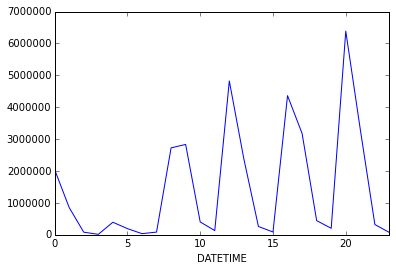

In [105]:
df.groupby(df.DATETIME.apply(lambda x: x.hour)).sum().IN_PRIME.plot()
#plt.xlim(datetime.datetime(2016, 3,28,0), datetime.datetime(2016, 3, 29, 0))

In [191]:
input()


"wedwed"


'wedwed'